In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
# Load the data
mouse_data = pd.read_csv('data/Mouse_metadata.csv')
study_data = pd.read_csv('data/Study_results.csv')

# Check the first few rows of each DataFrame
print(mouse_data.head())
print(study_data.head())

# Check the columns to make sure they match
print(mouse_data.columns)
print(study_data.columns)

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [14]:
# Merge the two DataFrames on 'Mouse ID'
merged_data = pd.merge(study_data, mouse_data, on='Mouse ID', how='inner')

# Check the first few rows of the merged data
print(merged_data.head())


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [17]:
# Generate summary statistics for the entire dataset
summary_stats = merged_data.describe()
print(summary_stats)

         Timepoint  Tumor Volume (mm3)  Metastatic Sites   Age_months  \
count  1893.000000         1893.000000       1893.000000  1893.000000   
mean     19.572108           50.448381          1.021659    12.814580   
std      14.079460            8.894722          1.137974     7.189592   
min       0.000000           22.050126          0.000000     1.000000   
25%       5.000000           45.000000          0.000000     7.000000   
50%      20.000000           48.951474          1.000000    13.000000   
75%      30.000000           56.292200          2.000000    20.000000   
max      45.000000           78.567014          4.000000    24.000000   

        Weight (g)  
count  1893.000000  
mean     25.662441  
std       3.921622  
min      15.000000  
25%      25.000000  
50%      27.000000  
75%      29.000000  
max      30.000000  


In [18]:
# Group by drug regimen to see specific statistics for each drug
drug_summary = merged_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    var_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
)
drug_summary.head()

,mean_tumor_volume,median_tumor_volume,var_tumor_volume,std_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


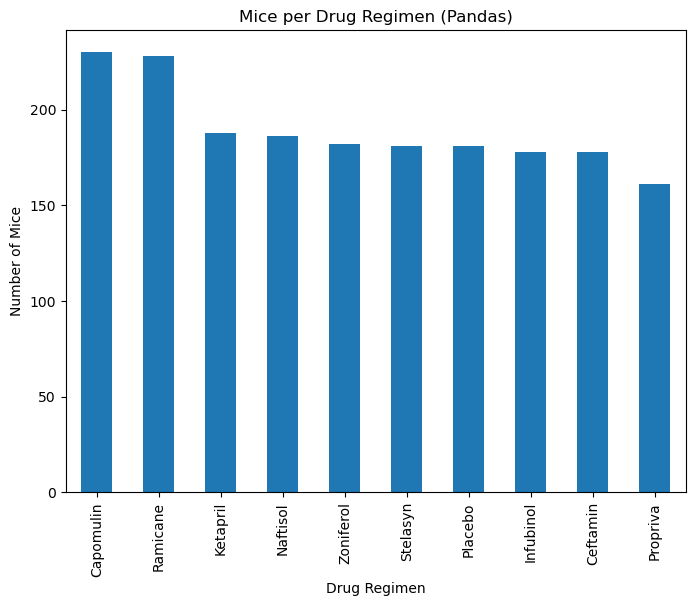

In [19]:
# Group by 'Drug Regimen' and count the number of mice in each regimen
mice_per_regimen = merged_data['Drug Regimen'].value_counts()

# Create a bar chart using Pandas
mice_per_regimen.plot(kind='bar', figsize=(8, 6), title='Mice per Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

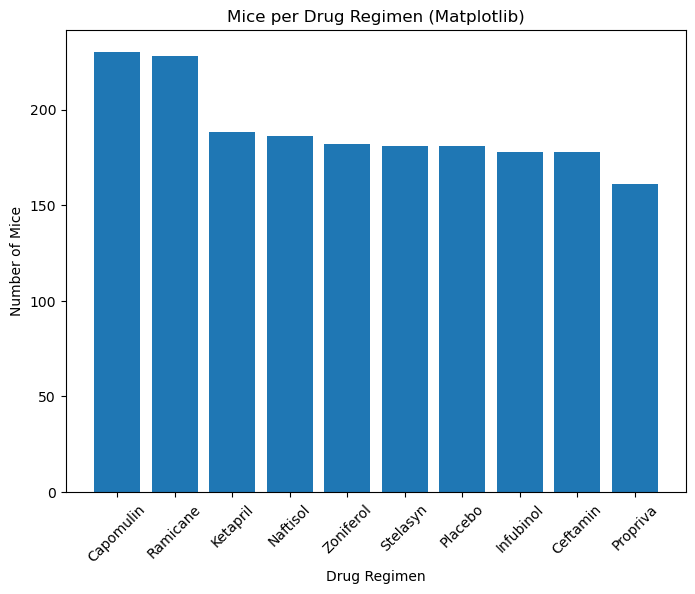

In [20]:
# Use the same data grouped by 'Drug Regimen'
mice_per_regimen = merged_data['Drug Regimen'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(mice_per_regimen.index, mice_per_regimen.values)
plt.title('Mice per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

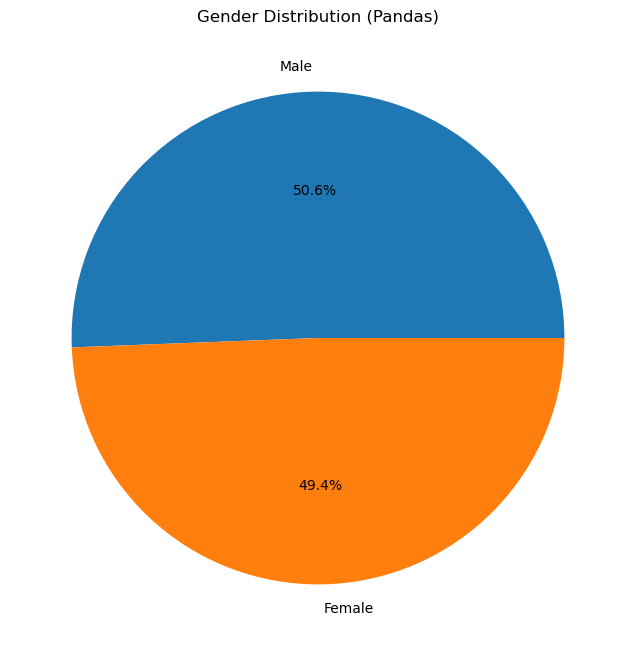

In [21]:
# Group by 'Sex' and count the number of mice in each group
gender_distribution = merged_data['Sex'].value_counts()

# Create a pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Gender Distribution (Pandas)')
plt.ylabel('')  # Suppress y-axis label for better visualization
plt.show()

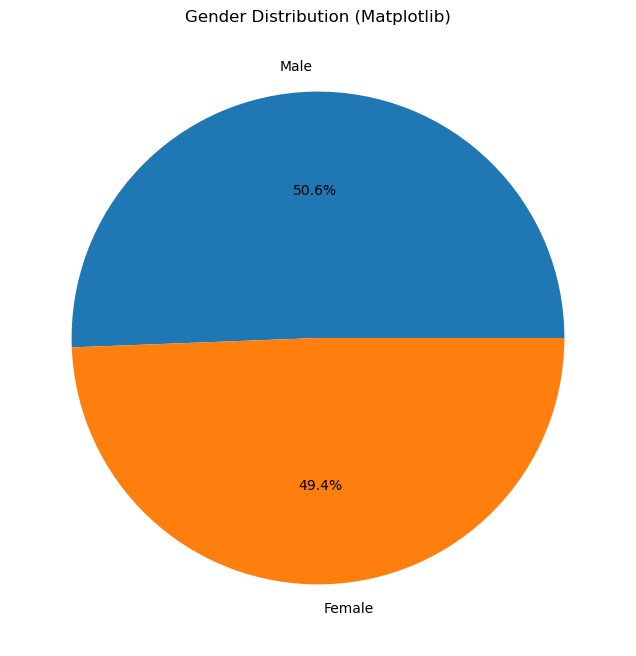

In [22]:
# Use the same data grouped by 'Sex'
gender_distribution = merged_data['Sex'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Gender Distribution (Matplotlib)')
plt.show()

In [23]:
# Select the drug regimens of interest
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(regimens)]

# Calculate quartiles and IQR for each drug regimen
for drug in regimens:
    drug_data = filtered_data[filtered_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"{drug} IQR: {iqr}")

    # Find outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drug} Outliers: {outliers}")

Capomulin IQR: 7.314067135000002
Capomulin Outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane IQR: 8.325365415
Ramicane Outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol IQR: 10.002090667500006
Infubinol Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin IQR: 9.593010457500007
Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


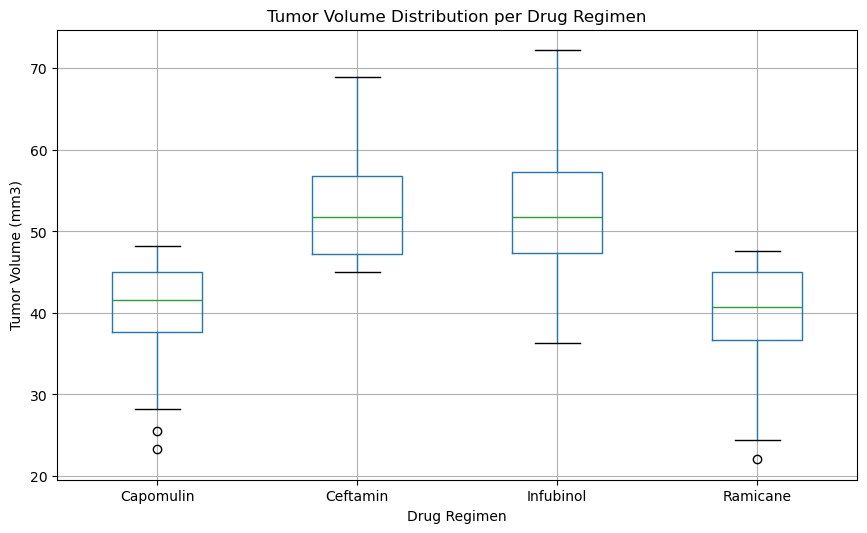

In [24]:
# Create a box plot for the selected drug regimens
filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(10,6))
plt.title('Tumor Volume Distribution per Drug Regimen')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

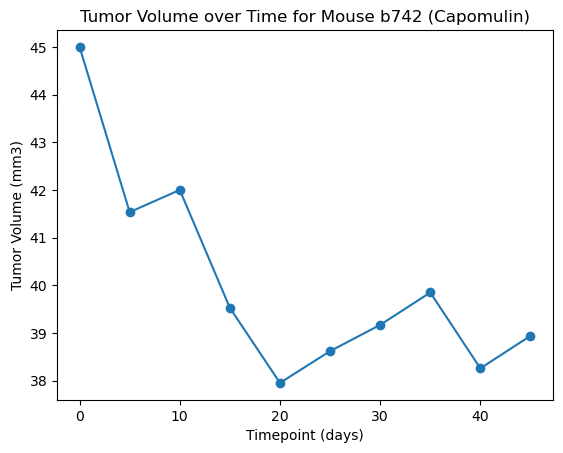

In [25]:
# Select a specific mouse treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'b742']

# Create a line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume over Time for Mouse b742 (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

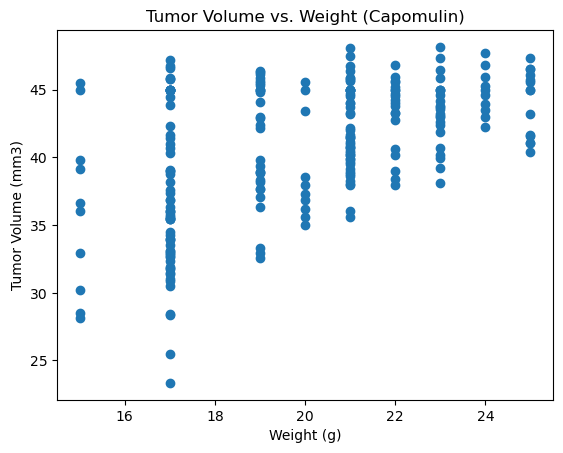

In [26]:
# Create a scatter plot for Capomulin regimen
capomulin_scatter = capomulin_data[['Weight (g)', 'Tumor Volume (mm3)']]
plt.scatter(capomulin_scatter['Weight (g)'], capomulin_scatter['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Weight (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [27]:
# Calculate the correlation coefficient
correlation = capomulin_scatter.corr().iloc[0, 1]
print(f'Correlation between mouse weight and tumor volume: {correlation}')


Correlation between mouse weight and tumor volume: 0.5256995552077155


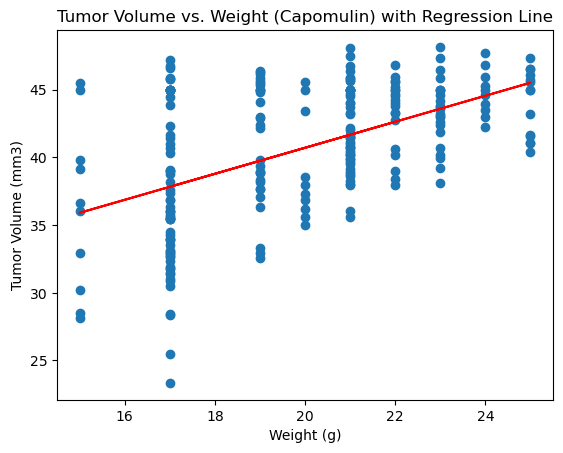

R-squared: 0.2763600223455914


In [28]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    capomulin_scatter['Weight (g)'], capomulin_scatter['Tumor Volume (mm3)']
)

# Plot the regression line
plt.scatter(capomulin_scatter['Weight (g)'], capomulin_scatter['Tumor Volume (mm3)'])
plt.plot(capomulin_scatter['Weight (g)'], 
         slope * capomulin_scatter['Weight (g)'] + intercept, 
         color='red')
plt.title('Tumor Volume vs. Weight (Capomulin) with Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print(f'R-squared: {r_value**2}')

In [ ]:
. Summary of the Study Results
Summarize the key insights from the analysis:

-Capomulin and Ramicane show promising results, 
    with lower tumor volumes compared to other treatments.
-Tumor volume and weight are moderately correlated 
        for the Capomulin regimen, indicating that weight might play a role in tumor growth.
-No significant gender bias was observed 
    in the study population.
-Potential outliers were found in Infubinol 
    and Ceftamin regimens, which might require further investigation.
